In [1]:
%pwd
%cd ..

/media/yana/discD/projects/farich-pics


In [2]:
from farichlib.DataPreprocessing import DataPreprocessing
from farichlib.DataPreprocessing import print_board
from farichlib.utils import iou_score
import numpy as np
import os
import pickle

%cd data/rootfiles

/media/yana/discD/projects/farich-pics/data/rootfiles


In [3]:
folder_root = '.'
rootfiles = [f for f in os.listdir(folder_root) if os.path.isfile(os.path.join(folder_root, f))]
rootfiles

['farichSimRes_e-mu-_3000MeV_0-90deg_30.0k_2020-02-07.root',
 'farichSimRes_pi-kaon-_1000MeV_0-90deg_50.0k_2020-02-11.root']

In [4]:
dp = DataPreprocessing()
dp.parse_root(*rootfiles)

In [8]:
#%%time 
H_all, h_all, mask_all = dp.generate_boards_randnum(board_size=100, N_circles=10, N_boards=10000)

0
5000


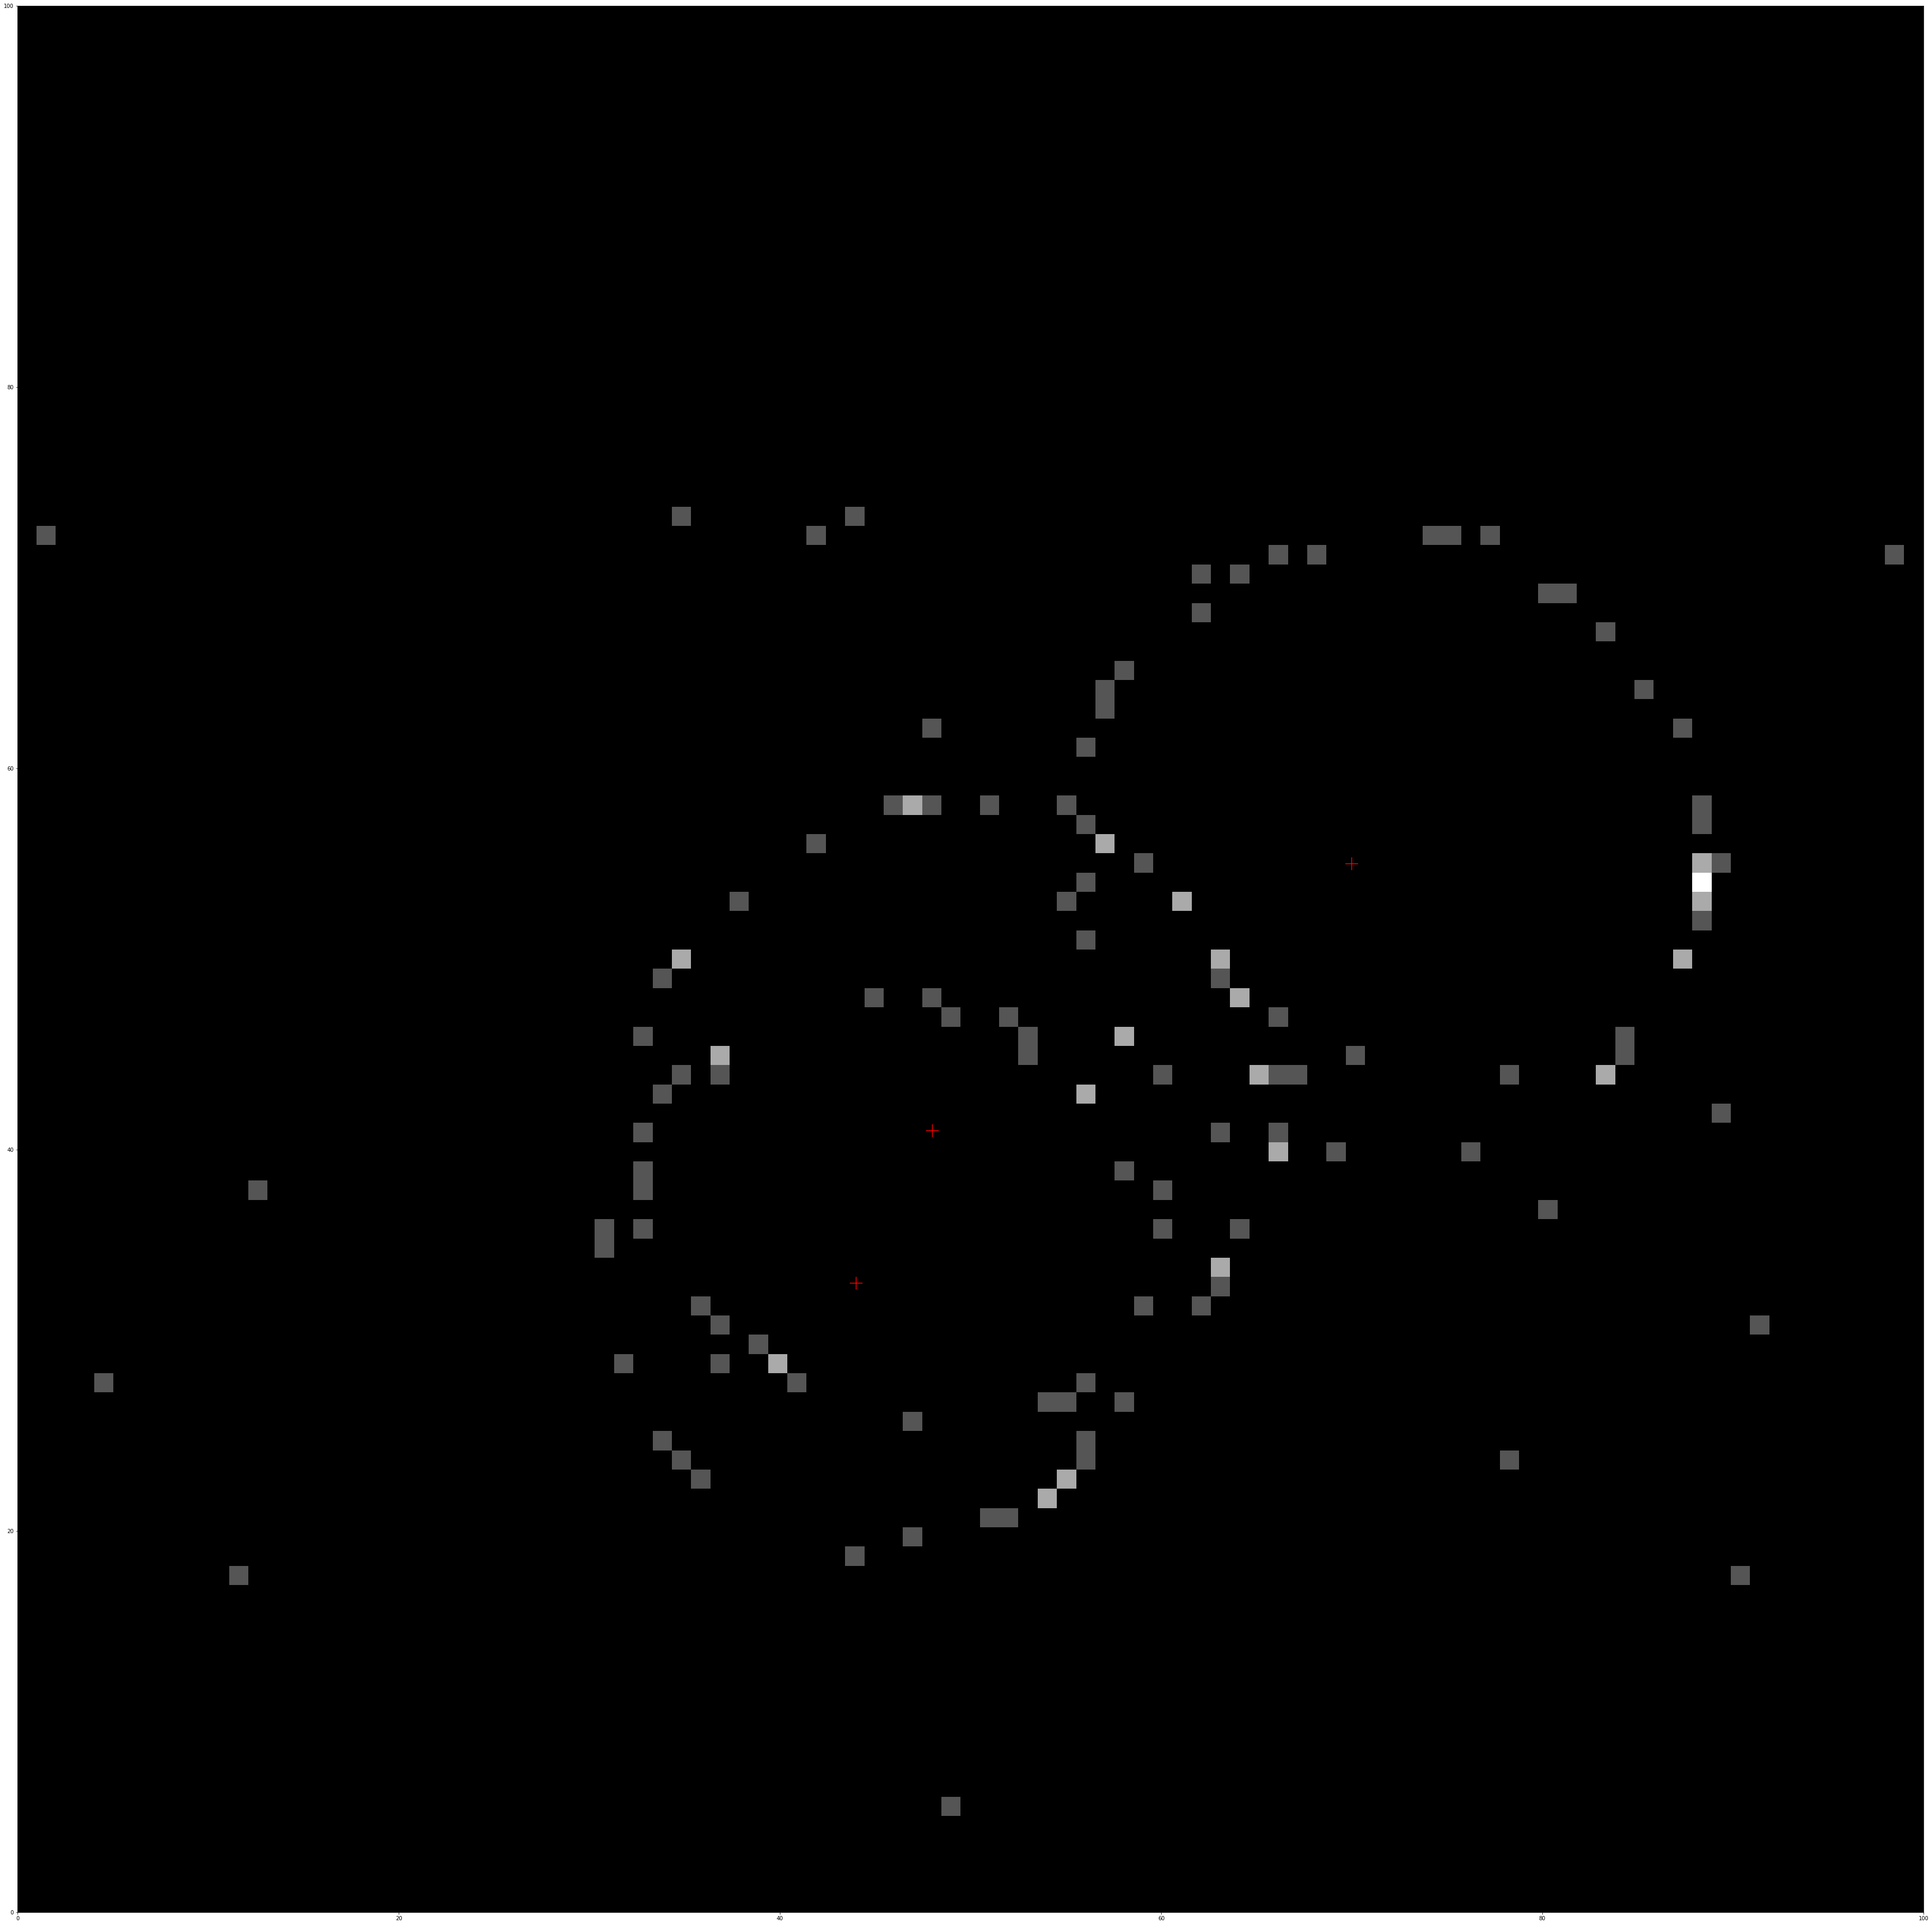

In [9]:
print_board(H_all[100], h_all[100])

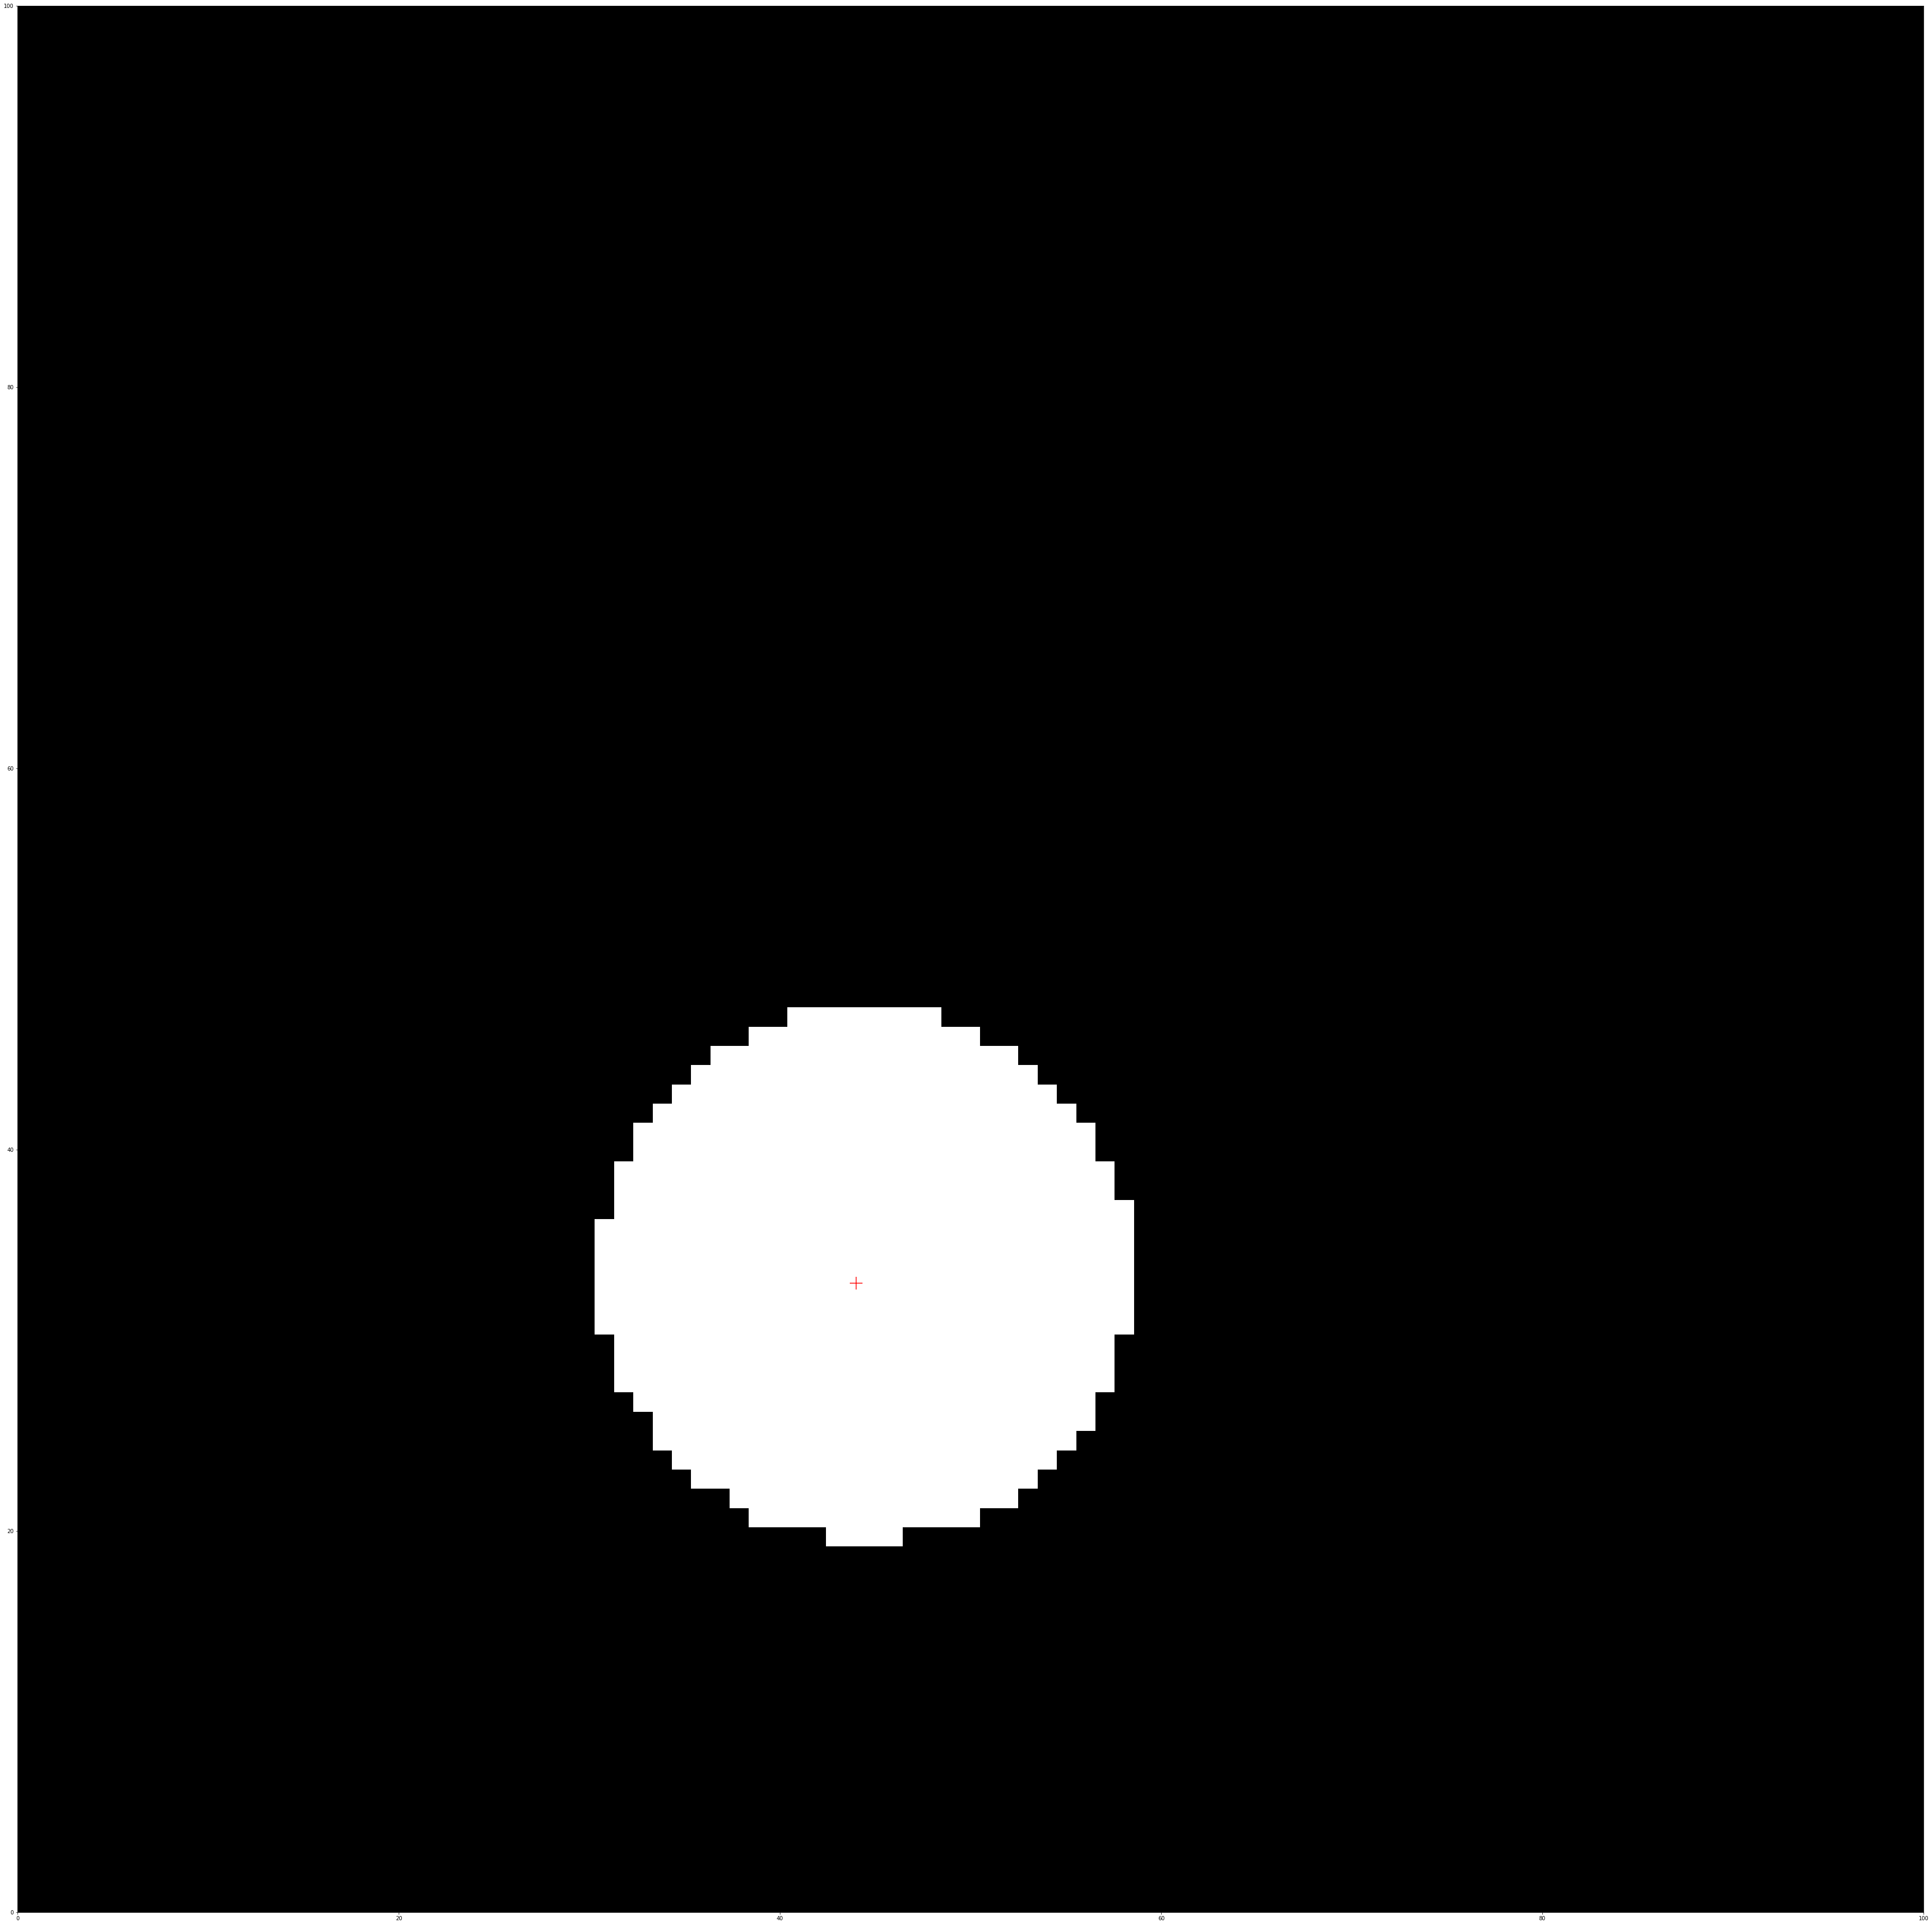

In [10]:
print_board(mask_all[100][0], h_all[100][0])

In [11]:
with open("../dataset/dataset.pkl", "wb") as f:
    pickle.dump((H_all, h_all, mask_all), f)

In [12]:
iou_score(mask_all[10][0], mask_all[0][0])

0.1926260346124906

In [13]:
iou_score(mask_all[0][0], mask_all[0][0])

1.0